     id                        listing_url       scrape_id last_scraped  \
0  3109  https://www.airbnb.com/rooms/3109  20241206031559   2024-12-07   
1  5396  https://www.airbnb.com/rooms/5396  20241206031559   2024-12-09   
2  7397  https://www.airbnb.com/rooms/7397  20241206031559   2024-12-08   
3  7964  https://www.airbnb.com/rooms/7964  20241206031559   2024-12-09   
4  9359  https://www.airbnb.com/rooms/9359  20241206031559   2024-12-09   

            source                                             name  \
0      city scrape                                     zen and calm   
1      city scrape     Your perfect Paris studio on Île Saint-Louis   
2      city scrape                 MARAIS - 2ROOMS APT - 2/4 PEOPLE   
3  previous scrape                     Sunny apartment with balcony   
4      city scrape  Cozy, Central Paris: WALK or VELIB EVERYWHERE !   

                                         description  \
0  Lovely Appartment with one bedroom with a Quee...   
1  NEW SOF

c:\Users\FranckPERSONNE\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1: R^2 = -0.0590
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 2.6012 - val_loss: 0.4351
Epoch 2/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 2: R^2 = -0.0330
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.4278 - val_loss: 0.4244
Epoch 3/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 3: R^2 = -0.1362
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3778 - val_loss: 0.4668
Epoch 4/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 4: R^2 = 0.0714
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.3423 - val_loss: 0.3815
Epoch 5/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 5: R^2 = 0.2771
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3036 - val_loss: 0.2970
Epoch 6/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 6: R^2 = 0.3641
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2842 - val_loss: 0.2613
Epoch 7/100
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Epoch 7: R^2 = 0.3381
1076/1076 ━━━━━━━━━━━

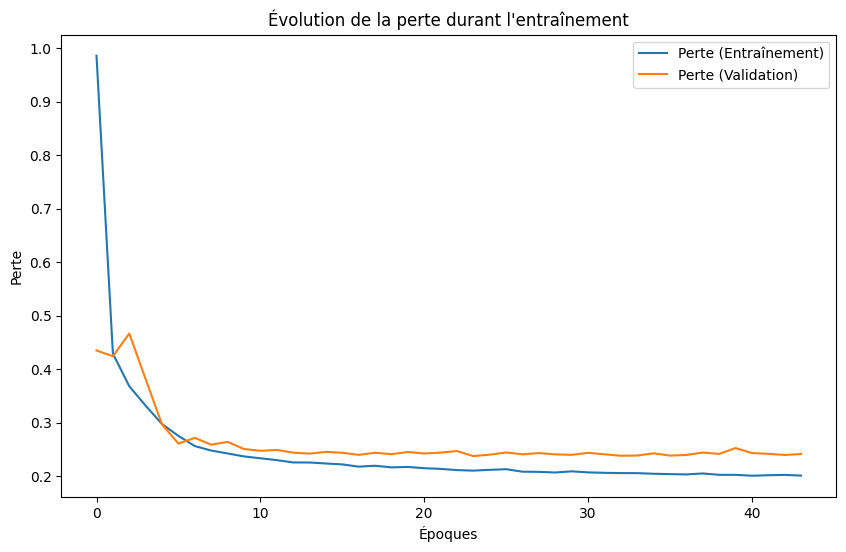

Premières prédictions: [[4.3140664]
 [5.3686213]
 [4.358495 ]
 [5.459998 ]
 [5.868975 ]]


In [ ]:
# # Importation des bibliothèques nécessaires
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Input
# from keras.callbacks import Callback, EarlyStopping
# from keras.optimizers import Adam
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.pipeline import Pipeline
# import matplotlib.pyplot as plt

# # 1. Chargement des données
# file_path = 'listings.csv'  # Remplacer par le chemin de votre fichier
# df = pd.read_csv(file_path)

# # 2. Affichage des premières lignes pour vérifier
# print(df.head())

# # 3. Sélection des colonnes pertinentes
# colonnes_pertinentes = [
#     'price', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
#     'bathrooms_text', 'neighbourhood_cleansed', 'host_is_superhost',
#     'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating',
#     'instant_bookable'
# ]
# df = df[colonnes_pertinentes]

# # 4. Traitement des données manquantes et nettoyage des colonnes
# df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
# # Transformation de la cible : application d'une transformation log (log1p pour éviter log(0))
# df['price'] = np.log1p(df['price'])

# df['bathrooms_text'] = df['bathrooms_text'].replace(
#     {'half': '0.5', ' bath': '', ' baths': '', 'bathroom': ''}, regex=True)
# df['bathrooms_text'] = pd.to_numeric(df['bathrooms_text'], errors='coerce')
# df = df.dropna(subset=['price', 'bathrooms_text'])

# # 5. Séparation des variables indépendantes (X) et de la variable cible (y)
# X = df.drop(columns=['price'])
# y = df['price']

# # 6. Prétraitement des données
# numeric_features = ['accommodates', 'bedrooms', 'beds', 'minimum_nights',
#                     'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'bathrooms_text']
# categorical_features = ['property_type', 'room_type', 'neighbourhood_cleansed',
#                         'host_is_superhost', 'instant_bookable']

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # 7. Division des données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train_transformed = preprocessor.fit_transform(X_train)
# X_test_transformed = preprocessor.transform(X_test)

# # 8. Définition du modèle de réseau de neurones amélioré
# model = Sequential()
# # Couche d'entrée + première couche cachée
# model.add(Dense(256, input_dim=X_train_transformed.shape[1], activation='relu'))
# model.add(Dropout(0.3))  # Régularisation par Dropout
# # Couche cachée supplémentaire
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# # Autre couche cachée
# model.add(Dense(64, activation='relu'))
# # Couche de sortie
# model.add(Dense(1))

# # Compilation du modèle avec un taux d'apprentissage ajusté
# optimizer = Adam(learning_rate=0.0005)
# model.compile(optimizer=optimizer, loss='mean_squared_error')

# # 9. Callback pour afficher le R^2 à chaque époque
# class R2Callback(Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         y_pred = self.model.predict(X_test_transformed)
#         current_r2 = r2_score(y_test, y_pred)
#         print(f"Epoch {epoch+1}: R^2 = {current_r2:.4f}")

# # EarlyStopping pour éviter le surentraînement
# early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# # 10. Entraînement du modèle
# history = model.fit(X_train_transformed, y_train, 
#                     epochs=100, 
#                     batch_size=32, 
#                     validation_data=(X_test_transformed, y_test),
#                     verbose=1, 
#                     callbacks=[R2Callback(), early_stop])

# # 11. Prédictions finales
# y_pred = model.predict(X_test_transformed)

# # 12. Évaluation finale du modèle
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# final_r2 = r2_score(y_test, y_pred)

# print(f"\nErreur Quadratique Moyenne (RMSE): {rmse:.2f}")
# print(f"Coefficient de Détermination (R^2): {final_r2:.4f}")

# # 13. Visualisation de la courbe d'entraînement
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Perte (Entraînement)')
# plt.plot(history.history['val_loss'], label='Perte (Validation)')
# plt.title("Évolution de la perte durant l'entraînement")
# plt.xlabel("Époques")
# plt.ylabel("Perte")
# plt.legend()
# plt.show()

# # 14. Affichage des premières prédictions
# print(f"Premières prédictions: {y_pred[:5]}")
